In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

data = pd.read_csv('data/nyc_data.csv', parse_dates=['pickup_datetime','dropoff_datetime'])
fare = pd.read_csv('data/nyc_fare.csv', parse_dates=['pickup_datetime'])

In [2]:
# GROUP BY
# 택시 데이터셋에서 주간통계를 살펴보고 주근그룹으로 데이터를 나누자
weekly=data.groupby(data.pickup_datetime.dt.weekofyear)
len(weekly)
# data.pickup_datetime.dt.weekofyear = 모든 운행을 주간으로 구분한 series 인스턴스
# groupby 메소드는 weekofyear값으로 그룹을 가진 객체를 반환한다.
# 1년은 52주므로, weekly는 52개 그룹이 된다.

52

In [3]:
y=weekly.size() #각그룹의 행의 수 반납
y.head(3)

pickup_datetime
1    17042
2    15941
3    17017
dtype: int64

In [4]:
#주에 따른 운행 그려보자
x=weekly.pickup_datetime.first()
x.head(3)

pickup_datetime
1   2013-01-01 00:00:00
2   2013-01-07 00:03:00
3   2013-01-14 00:00:51
Name: pickup_datetime, dtype: datetime64[ns]

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


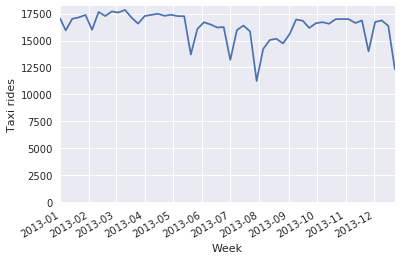

In [5]:
pd.Series(y.values, index=x).plot()
plt.ylim(0) #낮은 y값을 0dp tjfwjd
plt.xlabel('Week')
plt.ylabel('Taxi rides')

In [6]:
# 조인
# 1. fare 에서 각 택시에서 받은 평균 팁구하기
tip = fare[['medallion','tip_amount']].loc[fare.tip_amount >0].groupby('medallion').mean()
print(len(tip))
tip.head(3)

13407


,tip_amount
medallion,
00005007A9F30E289E760362F69E4EAD,1.815854
000318C2E3E6381580E5C99910A60668,2.857222
000351EDC735C079246435340A54C7C1,2.099111


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


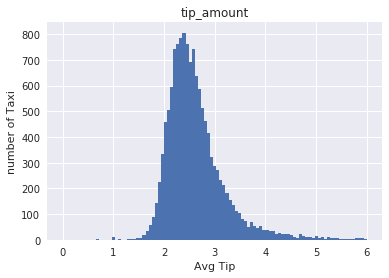

In [11]:
tip.hist(bins=np.linspace(0., 6., 100))
plt.xlabel('Avg Tip')
plt.ylabel('number of Taxi')

In [12]:
# 2. data 에 이 정보 넣기
#  how='left' 는 left outer join을 의미
#  left_on='medallion' 는 왼쪽 데이터프레임에서 조인할 키값
#  right_index=True 는 tip 데이터프레임이 medallion 으로 인덱스되어 있기 때문에 인덱스를 사용한다.

data_merged = pd.merge(data, tip, how='left', left_on='medallion', right_index=True)
data_merged.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,3.180417
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722,2.863235
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392,2.147143
